<a href="https://colab.research.google.com/github/thorat1607/thorat1607/blob/Devtern/Task_1_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

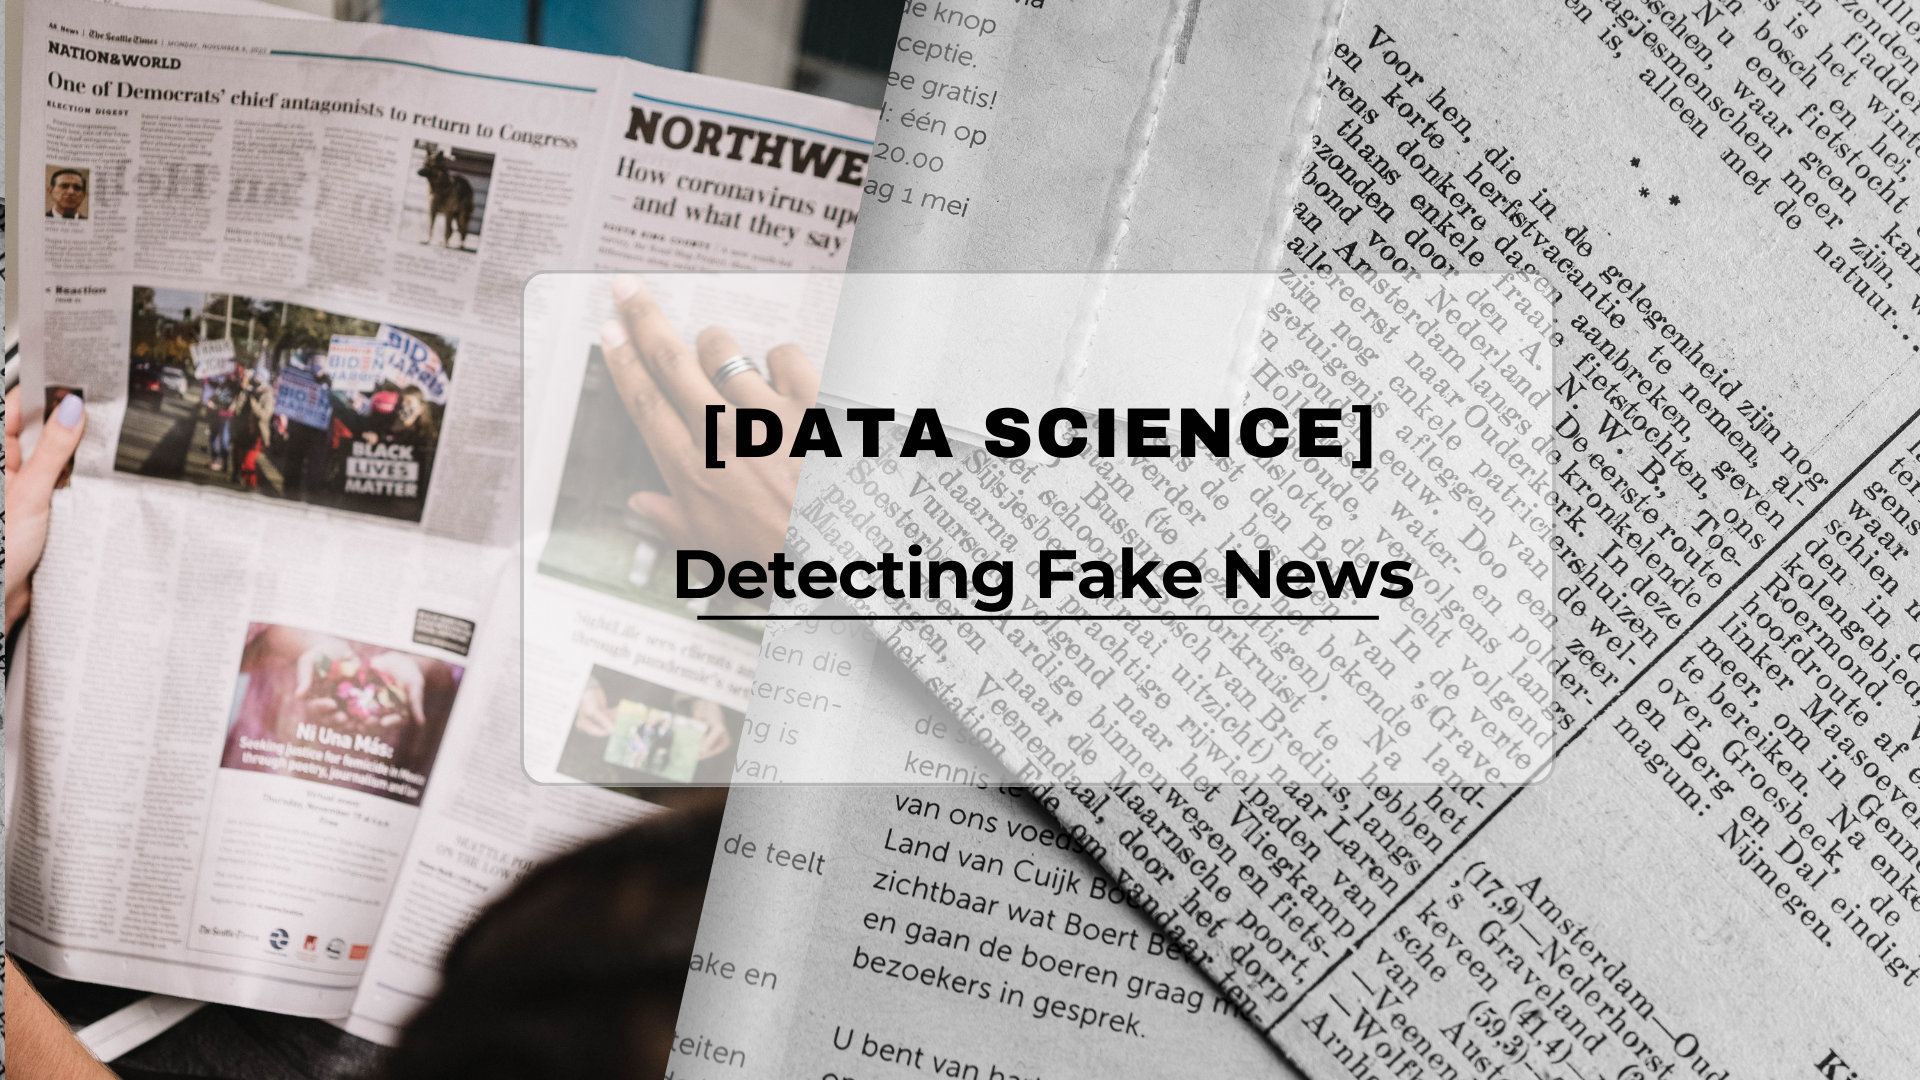

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 1: Data Exploration

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


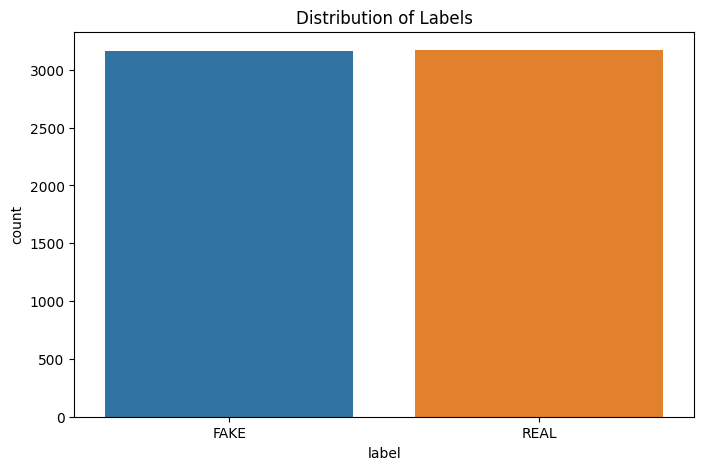

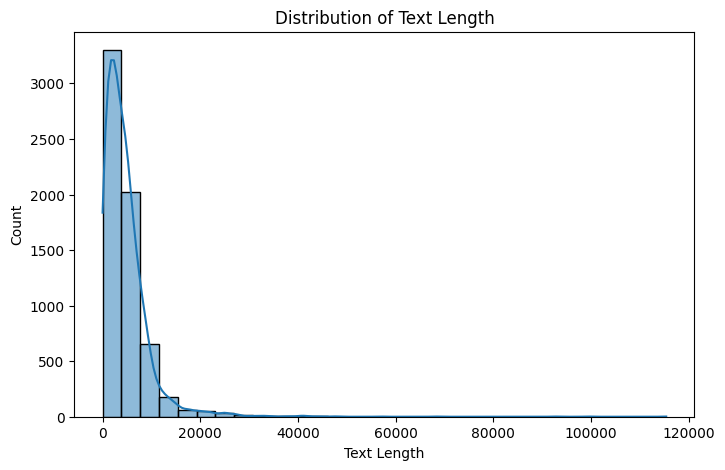

In [ ]:
# Read the dataset
data = pd.read_csv('/content/fake_or_real_news.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Display the distribution of labels in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

# Display the distribution of text length in the dataset
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Step 2: Model Building

In [ ]:

# Separate features and labels
X = data['text']
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Build the PassiveAggressiveClassifier model
pac_model = PassiveAggressiveClassifier(max_iter=50)
pac_model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

# Step 3: Model Evaluation

Accuracy: 0.94
Confusion Matrix:
[[588  40]
 [ 39 600]]


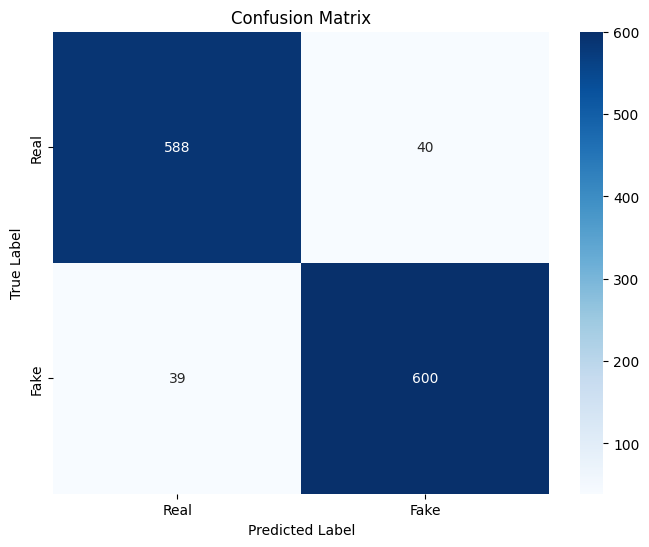

In [ ]:

# Predict on the test set
y_pred = pac_model.predict(tfidf_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()